# IÐN303G Tæknileg kerfi - Sýnishorn um lausn á skilaverkefni (með breytingum)

#Verkefnislýsing

Markmiðið er að gera fræðilegt líkan af vatnstanki með frjálsu útflæði og nota það til að spá fyrir um jafnvægishæð vatns miðað við gefnar forsendur um flatarmál botnflatar, þvermál úttaks við botn tanksins og fast innflæði.

* Setjið fram fræðilegt líkan af vatnstanki sem er með frjálst útflæði. Gera má ráð fyrir að útflæðið sé gefið með jöfnunni $$q_{út}=a\sqrt{2gh}$$
þar sem a er flatarmál úttaksins, g er þyngdarhröðun og h er vatnshæðin.
* Skrifið forrit í Python sem tekur við upplýsingum um flatarmál botnflatar, þvermál úttaks og innflæði og reiknar út vatnshæðina frá því að opnað er fyrir innflæði ($t_0$) inn í tóman tank þangað til skömmu eftir að hæðin hefur náð jafnvægi. Forritið skal einnig sýna niðurstöðurnar myndrænt. Keyrið forritið fyrir gefnar forsendur.
* Setjið fram niðurstöður í colab skjali (eða jupiter notebook) þar sem þið blandið saman texta, jöfnum og kóða. Skjalið skal hafa eftirfarandi hluta:
<ul type="circle">
<li>Inngangur</li>
<li>Fræðileg undirstaða líkans</li>
<li>Aðferðafræði</li>
<li>Niðurstöður</li>
<li>Ályktanir</li>
</ul>
* Skilið ipynb útgáfu af skjalinu í gegnum skilahólf á Canvas.

#Lausn

## Inngangur
Markmiðið með þessu verkefni er að gera fræðilegt líkan af vatnstanki með frjálsu útflæði og nota það til að spá
fyrir um jafnvægishæð vatns miðað við gefnar forsendur um flatarmál botnflatar, flatarmál úttaks á botni tanksins og innflæði.

Niðurstöður verkefnisins eru settar fram í þessu ipynb skjali. Fyrst er fræðilegt líkan af tankinum sett upp og
þar á eftir er með hermun spáð fyrir um breytingar í vatnshæð þar til jafnvægishæð er náð. Í lokaorðum eru niðurstöðurnar dregnar
saman.

## Fræðileg undirstaða líkans

Kerfið sem um ræðir er vatnstankur með botnflatarmálið $A$ og á botninum er úttak með flatarmál $a$. Samkvæmt fyrirmælum má gera ráð fyrir að um útstreymið úr tanknum ($q_{út}(t)$) gildi:

\begin{equation}
q_{út}(t)=a\sqrt{2gh(t)}
\end{equation}

þar sem $g$ táknar þyngdarhröðun og $h(t)$ vatnshæðina í tanknum.

Vatnshæðin í tanknum er háð bæði inn- og útflæðinu. Ef innflæðið er meira en útflæðið hækkar vatnsborðið og það lækkar ef útrennslið er meira en innrennslið. Það er vegna þess að mismunur á inn- og útrennsli er jafn breytingu
í rúmmáli vatnsins í tanknum sem tákna má stærðfræðilega sem

\begin{equation}
\frac{dV(t)}{dt}=\frac{dh(t)}{dt}A=q_{inn}(t)-q_{út}(t)
\end{equation}

Ef við setjum jöfnuna fyrir útflæðið inn í jöfnuna hér fyrir ofan fáum við

\begin{equation}
\frac{dh(t)}{dt}A=q_{inn}(t)-a\sqrt{2gh(t)}
\end{equation}

Ef $q_{inn}(t)=Q_0$, þ.e. innflæðið er fast frá því að það er sett í gang við $t_0$, þá hækkar hæðin þar til innflæðið er jafnt og útflæðið. Þá verður $dh(t)/dt=0$ og hægt að finna jafnvægishæðina ($h_0$) út frá

\begin{equation}
Q_0=a\sqrt{2gh_0}
\end{equation}

\begin{equation}
h_0=\frac{1}{2g}\left(\frac{Q_0}{a}\right)^2
\end{equation}

Við getum hinsvegar reiknað út hvernig $h(t)$ nær jafnvægi með því að herma eftirfarandi (ólínulegu) diffurjöfnu

\begin{equation}
\frac{dh(t)}{dt}A+a\sqrt{2gh(t)}=Q_0
\end{equation}

## Aðferðafræði

Við hermunina nýtum við okkur að afleiðan af $f(x)$ er skilgreind sem

\begin{equation}
f'(t)=\lim_{\Delta t \to 0}\frac{f(t+\Delta t)-f(t)}{\Delta t}
\end{equation}

og ef við veljum $\Delta t$ nægilega lítið þá getum við skrifað
    
\begin{equation}
f(t+\Delta t)=f(t)+{\Delta t}f'(t)
\end{equation}

Ef upphafstími hermunarinnar er $t_0$ og $f(t_0)$ er gefið getum við reiknað $f(t_i)$ fyrir $i \in {1,2,...,n}$ með

\begin{equation}
f(t_i)=f(t_{i-1})+{\Delta t}f'(t_{i-1})
\end{equation}

þar sem $t_i=t_{i-1}+{\Delta t}$.

Fyrir diffurjöfnuna okkar gildir að

\begin{equation}
h'(t)A+a\sqrt{2gh(t)}=Q_0
\end{equation}

sem við endurröðum til að fá

\begin{equation}
h'(t)=\frac{1}{A}\left(Q_0-a\sqrt{2gh(t)}\right)
\end{equation}

Grunnjafnan í hermuninni verður því

\begin{equation}
h(t_i)=h(t_{i-1})+{\Delta t}h'(t_{i-1})=h(t_{i-1})+{\Delta t}\frac{1}{A}\left(Q_0-a\sqrt{2gh(t_{i-1})}\right)
\end{equation}

og þar sem tankurinn er tómur í upphafi er $h(t_0)=0$.

Hermunin er keyrð í ákveðin tíma þar sem tryggt er að jafnvægi sé náð.

## Niðurstöður

Hér fyrir neðan er kóði sem keyrir hermunina fyrir valin gildi á $A$, $a$, og $Q_0$ og birtir niðurstöður á myndrænan hátt. Fræðileg jafnvægishæð er merkt inn sem aðfella. Einnig eru sýndar breytingar í vatnshæð og útflæði fyrir gefið gildi á a.

Útreiknuð jafnvægishæð  0 :  0.0440 m
Útreiknuð jafnvægishæð  1 :  0.0087 m


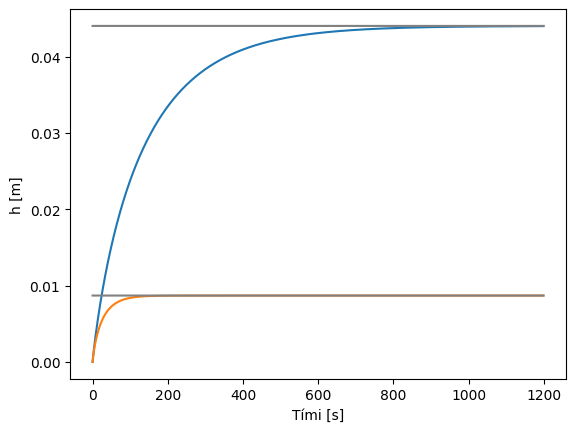

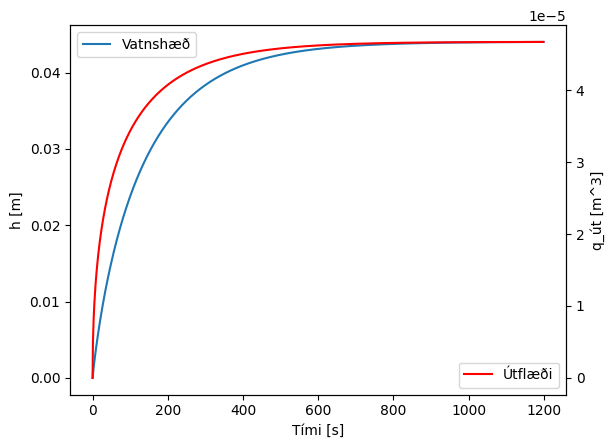

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#Breytur tanksins (Einingar: A (m^2), a (m^2), Q_0 (m^3/s))
A = 0.3 * 0.3
a = ((0.004)**2 * np.pi,(0.006)**2 * np.pi)
Q_0 = 4.67e-5

#Þyngdarhröðun
g = 9.8

#Útreiknuð jafnvægishæð
h_eq = np.zeros(len(a))

delta_t = 1
T_simulation = 60 * 20 # Set tíma hermunar. Einfaldað frá því í fyrra dæmi til að allir vigrar séu jafn langir.
N_simulation = int( T_simulation / delta_t )
h = np.zeros((2, N_simulation)) # Vatnshæð
q = np.zeros((2, N_simulation)) # Útflæði

# Hermun
for i in range(0,len(a)):
  h_eq[i] = (1 / (2 * g)) * pow(Q_0 / a[i], 2)
  print("Útreiknuð jafnvægishæð ", f'{i}', ": ", f'{h_eq[i]:.4f}', "m")

  for t in range(1,N_simulation):
      h[i,t] = h[i,t-1] + delta_t * (1 / A) * (Q_0 - a[i] * np.sqrt(2 * g * h[i,t-1]))
      q[i,t] = a[i] * np.sqrt(2 * g * h[i,t])

# Myndir

time = np.arange(N_simulation) * delta_t
h_eq_calc=np.ones((2,len(time)))

fig, ax = plt.subplots()
ax.set_xlabel('Tími [s]')
ax.set_ylabel('h [m]')

for i in range(0,len(a)):
  h_eq_calc[i,:] = h_eq[i] * h_eq_calc[i,:]
  ax.plot(time, h[i,:])
  ax.plot(time, h_eq_calc[i,:] ,color="gray")

plt.show()

fig, ax1 = plt.subplots()

ax1.plot(time, h[0,:])
ax2 = ax1.twinx()

ax2.plot(time, q[0,:],color='red')

ax1.set_xlabel('Tími [s]')
ax1.set_ylabel('h [m]')
ax2.set_ylabel('q_út [m^3]')

ax1.legend(['Vatnshæð'])
ax2.legend(['Útflæði'], loc='lower right')

plt.show()


Við sjáum á myndinni að að vatnshæðin vex hratt í fyrstu þegar innflæðið er talsvert meira en útflæðið en svo vex hún hægar eftir því sem útflæðið færist nær innflæðinu. Við sjáum líka að niðurstöðurnar eru í samræmi við útreiknað gildi.

Þegar vatnshæðin og útflæðið eru teiknuð á sama graf þá sést að útflæðið vex hraðar en vatnshæðin þar til báðar stærðir ná jafnvægi.

## Ályktanir
Jafnan sem lýsir sambandi hæðar og innflæðis er ólínuleg. Það er tiltölulega einfalt að reikna jafnvægishæðina út en flóknara að leysa diffurjöfnuna til að sjá hvernig kerfið hegðar sér meðan það er á leið í jafnvægi. Þá kemur sér vel að nota hermun til þess leysa jöfnuna á tölulegan hátt. Það er áhugavert að samkvæmt líkaninu er jafnvægishæðin einungis háð innflæði og flatarmáli úttaksins en óháð botnflatarmáli tanksins.